# Paso 0 - Preliminares

In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# fetch dataset
room_occupancy_estimation = fetch_ucirepo(id=864)

# data (as pandas dataframes)
X = room_occupancy_estimation.data.features
y = room_occupancy_estimation.data.targets

# metadata
print(room_occupancy_estimation.metadata)


{'uci_id': 864, 'name': 'Room Occupancy Estimation', 'repository_url': 'https://archive.ics.uci.edu/dataset/864/room+occupancy+estimation', 'data_url': 'https://archive.ics.uci.edu/static/public/864/data.csv', 'abstract': 'Data set for estimating the precise number of occupants in a room using multiple non-intrusive environmental sensors like temperature, light, sound, CO2 and PIR.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 10129, 'num_features': 18, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Room_Occupancy_Count'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Wed Aug 16 2023', 'dataset_doi': '10.24432/C5P605', 'creators': ['Adarsh Pal Singh', 'Sachin Chaudhari'], 'intro_paper': {'title': 'Machine Learning-Based Occupancy Estimation Using Multivariate Sensor Nodes', 'authors': 'A. Singh, Vivek Jain, 

In [4]:
#Hacer una copia de X
df_X = X.copy()
df_y = y.copy()

In [5]:
#Combinar columnas Date y Time
df_X['Timestamp'] = pd.to_datetime(df_X['Date'].astype(str) + ' ' + df_X['Time'].astype(str))

#Elimiar colimnas Date y Time
df_X = df_X.drop(['Date', 'Time'], axis=1)

#Visualizar el resultado
df_X.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Timestamp
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,2017-12-22 10:49:41
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,2017-12-22 10:50:12
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,2017-12-22 10:50:42
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,2017-12-22 10:51:13
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,2017-12-22 10:51:44


# Paso 1 - Preparación de los datos

## Limpieza de los datos
### Verificar y manejar los datos faltantes
**Opciones de manejo:** Puedes optar por eliminar los registros con valores faltantes, imputarlos usando la media, mediana, o algún algoritmo más sofisticado, según lo permita tu caso de uso.

In [6]:
#Visualizar datos faltantes por columnas para df_X
df_X.isnull().sum()

S1_Temp         0
S2_Temp         0
S3_Temp         0
S4_Temp         0
S1_Light        0
S2_Light        0
S3_Light        0
S4_Light        0
S1_Sound        0
S2_Sound        0
S3_Sound        0
S4_Sound        0
S5_CO2          0
S5_CO2_Slope    0
S6_PIR          0
S7_PIR          0
Timestamp       0
dtype: int64

In [7]:
#Visualizar datos faltantes por columnas para df_y
df_y.isnull().sum()

Room_Occupancy_Count    0
dtype: int64

No existen datos nulos, por lo tanto NO SE REALIZA MANEJO en este primer paso de limpieza. Los datos ya están limpios

## Verficar los tipos de datos
Asegúrate de que cada característica tenga el tipo de dato apropiado (numérico, categórico, fecha, etc.). Convierte los tipos de datos si es necesario.

In [8]:
#ver tipo de datos actuales
print(df_X.dtypes)

S1_Temp                float64
S2_Temp                float64
S3_Temp                float64
S4_Temp                float64
S1_Light                 int64
S2_Light                 int64
S3_Light                 int64
S4_Light                 int64
S1_Sound               float64
S2_Sound               float64
S3_Sound               float64
S4_Sound               float64
S5_CO2                   int64
S5_CO2_Slope           float64
S6_PIR                   int64
S7_PIR                   int64
Timestamp       datetime64[ns]
dtype: object


## Detección y manejo de Outliers
Identifica valores atípicos que puedan afectar el desempeño del modelo. Utiliza técnicas como IQR (rango intercuartílico) o Z-score para identificar y tratar estos valores.

## Integridad de los datos
Revisa que los datos sean consistentes y precisos, sin duplicados ni errores en la entrada de datos.

In [9]:
#Verificar duplicados
df_X.duplicated().sum()

0

En el dataframe df_X no existen duplicados así que no se realiza manejo. Por otra parte, df_y no se verifica duplicados porque en primer lugar si existen y segundo es validos que existan duplicados al ser la ocupación de personas en el espacio.

# Paso 2 - Analisis Exploratorio de Datos


In [10]:
# Descripción estadística de las variables numéricas
print(df_X.describe())

            S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454012     25.546059     25.056621     25.754125     25.445059   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   
std        0.351351      0.586325      0.427283      0.356434     51.011264   

          S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10129.00000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      26.01629     34.248494     13.220259      0.168178      0.120066   
min        0.00000      0.000000      0.000000      0.

## Interpretación General

### **Temperatura (S1_Temp, S2_Temp, S3_Temp, S4_Temp):**

- **Media y Mediana:** Las medias y medianas están en un rango similar para S1, S2, S3 y S4, lo que indica que las temperaturas medidas por los sensores tienden a estar distribuidas uniformemente sin un sesgo significativo.
- **Mínimo y Máximo:** Los valores mínimos y máximos están en un rango razonable para los sensores de temperatura, sin extremos alarmantes que sugieran errores de lectura.
- **Desviación Estándar:** Las desviaciones estándar son relativamente bajas, indicando que las lecturas de temperatura tienden a ser consistentes y no varían demasiado.

### **Luz (S1_Light, S2_Light, S3_Light, S4_Light):**

- Los valores mínimos son 0 para S2, S3 y S4, lo que podría significar ausencia de luz o que los sensores no detectaron luz en algunos momentos.
- Los máximos varían considerablemente entre los sensores, lo que podría sugerir diferencias en la exposición a la luz o en la sensibilidad de los sensores.
- Hay una gran desviación estándar en S2_Light y S3_Light, indicando una amplia variabilidad en las mediciones de luz.

### **Sonido (S1_Sound, S2_Sound, S3_Sound, S4_Sound):**

- Las medias y las medianas tienen una diferencia notable, especialmente en S1_Sound, lo que puede sugerir una distribución sesgada o la presencia de outliers.
- La desviación estándar es particularmente alta en S1_Sound, lo que indica una gran variabilidad en las mediciones de sonido en este sensor.

### **CO2 (S5_CO2):**

- La media está cercana a los valores del tercer cuartil (75%), lo que podría indicar que hay una distribución sesgada hacia valores más altos o la presencia de outliers.

### **Slope (S5_CO2_Slope):**

- Es una característica calculada, representando la tasa de cambio de los niveles de CO2. La desviación estándar es cercana a cero, lo que sugiere que los valores no varían mucho.

### **PIR (S6_PIR):**

- Esta es una característica binaria o de conteo (presencia o ausencia), dado que la mediana es 0 y el 75% de los valores también lo es. Esto implica que la mayoría de las veces no se detectó movimiento.

### **Timestamp:**

- Representa el rango de fechas y horas durante las cuales se tomaron los datos. La fecha mínima es 2017-12-27 y la máxima es 2018-01-11, indicando que los datos abarcan alrededor de dos semanas.

In [11]:
# Estadisticas descriptivas para la ocupación de la sala df_y:
print(df_y.describe())

       Room_Occupancy_Count
count          10129.000000
mean               0.398559
std                0.893633
min                0.000000
25%                0.000000
50%                0.000000
75%                0.000000
max                3.000000


### Interpretación general.
Esta tabla resume las estadísticas descriptivas para una variable que representa la cantidad de personas en una sala (Room_Occupancy_Count).

- **count:** Indica que hay 10,129 observaciones en el dataset. Este es el número total de registros.

- **mean**: La media es aproximadamente 0.399, lo que sugiere que, en promedio, hay menos de una persona en la sala cuando se toma una medición.

- **std**: La desviación estándar es aproximadamente 0.894, lo que indica que hay una variabilidad considerable en la cantidad de personas en la sala en relación con la media.

- **min**: El valor mínimo es 0, lo que indica que hay momentos en que la sala está vacía.

- **25%**: El primer cuartil es 0, lo que sugiere que en el 25% de las mediciones, la sala está vacía.

- **50% (median)**: La mediana es 0, lo que significa que más de la mitad de las veces la sala está vacía cuando se toma una medición.

- **75%:** El tercer cuartil es 0, indicando que hasta el 75% de las veces, la sala está vacía o tiene muy pocas personas.

- **max:** El valor máximo es 3, lo que significa que el mayor número de personas detectado en la sala a la vez es 3.

### Interpretación Contextualizada
- **Baja ocupación:** La mayoría de los datos indican que la sala raramente está ocupada. Es decir, la mayoría del tiempo la sala tiene 0 personas.

- **Rango limitado de ocupación:** La cuenta máxima es 3, lo que es relativamente baja.

- **Distribución sesgada:** La media más baja que la mediana sugiere una distribución sesgada hacia la izquierda con una concentración de valores en el extremo inferior de la escala.

### Vizualización de las distribuciones


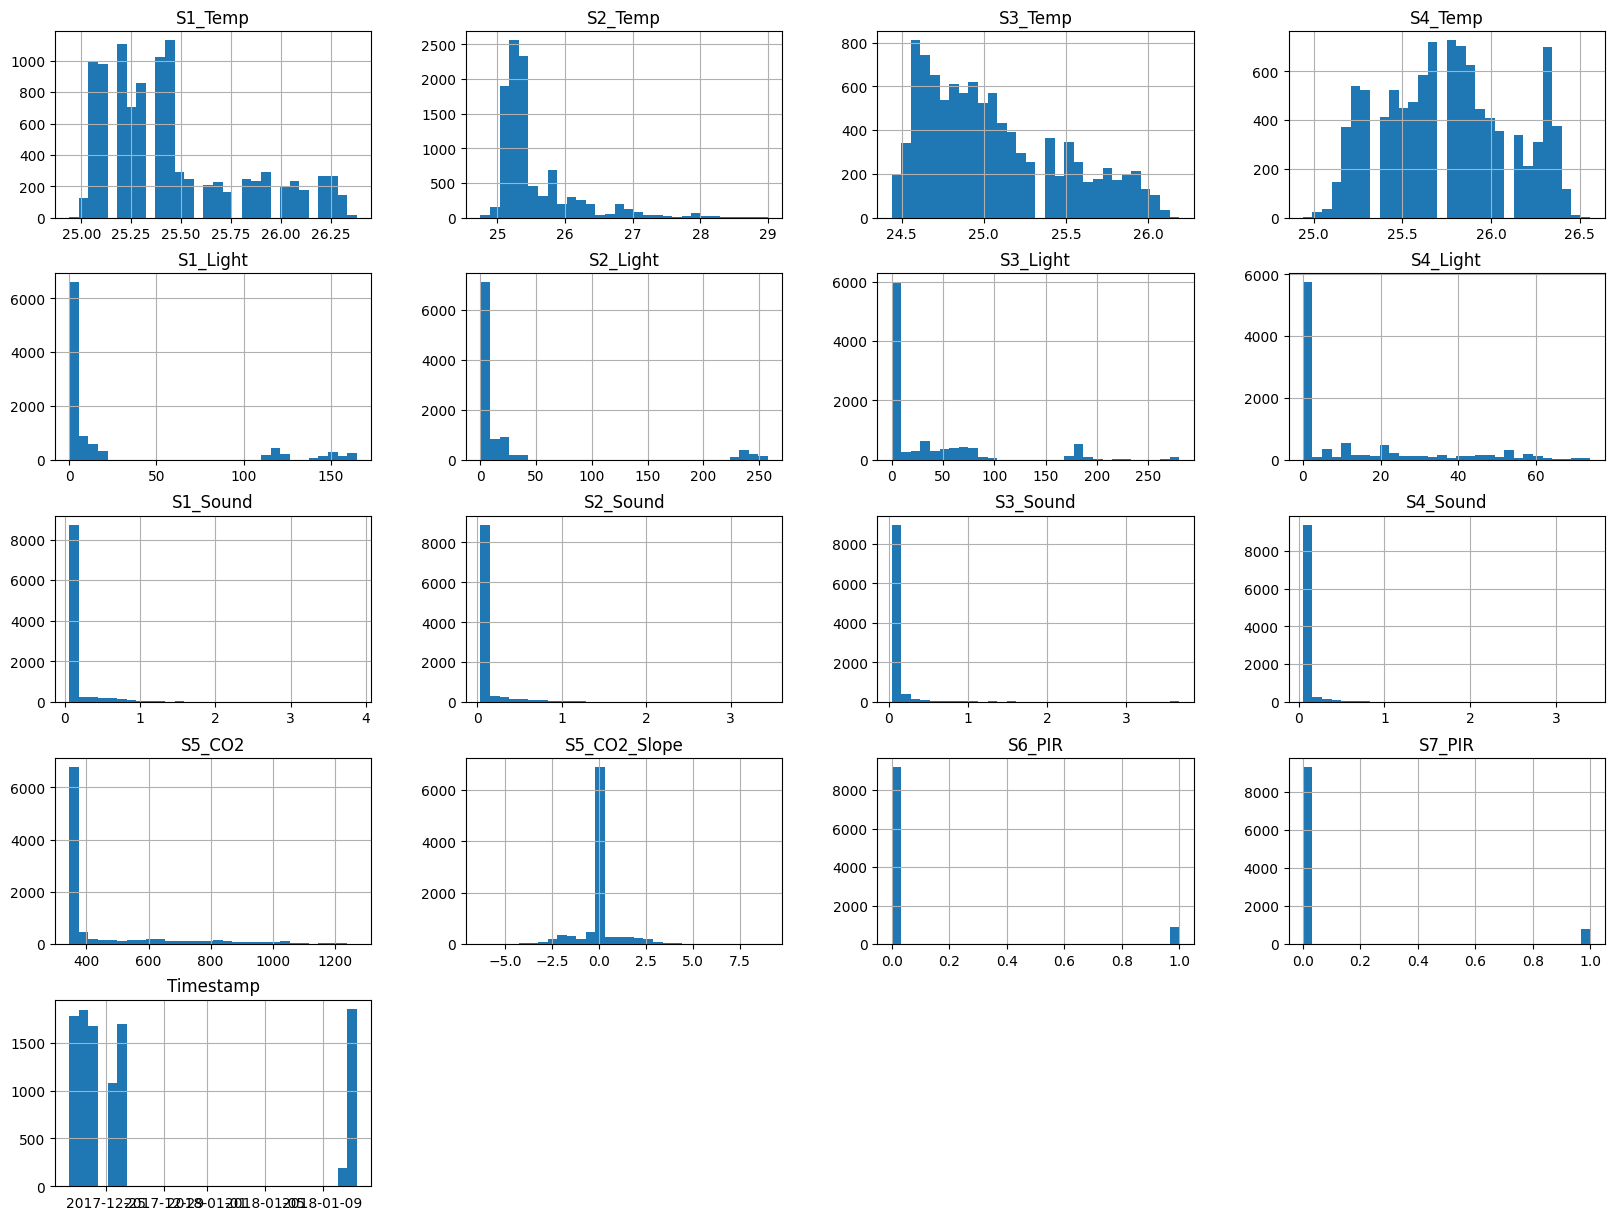

In [12]:
# Histogramas para todas las variables numéricas
df_X.hist(bins=30, figsize=(20, 15))
plt.show()

### Interpretaciones Generales
Aquí están algunas interpretaciones clave que podemos extraer de estas visualizaciones:

1. **Temperatura.**
 - **S1_Temp:** Muestra una distribución bimodal con dos picos prominentes alrededor de 25.5°C y 26.0°C. Esto podría sugerir que hay dos estados o condiciones de temperatura que se presentan con más frecuencia para este sensor.

 - **S2_Temp:** Presenta una distribución sesgada hacia la derecha, con la mayoría de las lecturas agrupadas alrededor de 25.5°C y menos frecuentes a medida que aumenta la temperatura. Esto podría indicar que este sensor raramente registra temperaturas altas.

 - **S3_Temp:** Tiene una distribución que parece aproximadamente normal, centrada alrededor de 25.5°C. Esto podría indicar que las condiciones de temperatura en la ubicación de este sensor son relativamente estables y consistentes.

 - **S4_Temp:** Exhibe una distribución con múltiples picos, lo que podría indicar la presencia de varias condiciones de temperatura que ocurren con regularidad. Los picos sugieren temperaturas comunes alrededor de 25.5°C y 26.5°C.

 **Análisis General Temperatura**
 - **Consistencia:** Las temperaturas para todos los sensores parecen oscilar principalmente entre aproximadamente 25°C y 26.5°C, lo cual sugiere cierto grado de consistencia en las condiciones de temperatura a lo largo del tiempo o entre diferentes ubicaciones (si es que los sensores están en diferentes ubicaciones).

 - **Variabilidad:** Los diferentes patrones de distribución indican que hay variabilidad en cómo cada sensor registra la temperatura. Esto podría ser debido a las diferencias en la ubicación de los sensores, la calibración, la exposición a fuentes de calor, o la circulación de aire.


2. **Interpretaciones Distrubuciones sensores de Luz**
 - **S1_Light y S2_Light:** Muestran una concentración significativa de valores cerca de cero, lo que sugiere que durante muchos periodos no se detectó luz o los niveles eran muy bajos. Además, hay una distribución de valores hacia lecturas más altas, pero estos son considerablemente menos frecuentes.

  - **S3_Light:** Similar a S1 y S2, también presenta una concentración alta de lecturas cerca del cero. No obstante, difiere en que no hay una cola larga de valores más altos. Esto podría indicar que el sensor S3 no estuvo expuesto a niveles de luz tan altos como S1 y S2 o que tiene una sensibilidad diferente.

  - **S4_Light:** Exhibe una distribución muy diferente en comparación con los otros sensores, con un rango mucho más estrecho de valores y menos lecturas cerca de cero. Esto sugiere que este sensor detecta luz con más frecuencia que los otros, lo que podría ser debido a una colocación que le expone más a la luz o diferencias en la sensibilidad.

 **Interpretación General**
 - **Variabilidad en la Exposición:** La variabilidad entre los histogramas sugiere que los sensores están expuestos a cantidades de luz muy diferentes, lo cual podría ser debido a su ubicación física o las condiciones ambientales que enfrentan.

 - **Posible Oscuridad Prolongada:** La alta frecuencia de valores bajos o cero podría indicar que hay períodos prolongados de oscuridad o poca luz, lo cual podría ser de noche o cuando la sala está desocupada y las luces apagadas.


3. **Sensores de Sonido**
 - **Concentración Cerca de Cero:** Para todos los sensores de sonido, hay una concentración masiva de valores cerca del cero, lo cual indica que la mayoría del tiempo, los sensores están registrando niveles muy bajos de sonido.

 - **Poca Variabilidad:** Los histogramas de todos los sensores muestran muy poca variabilidad en los niveles de sonido, con la gran mayoría de los valores concentrados en la primera barra del histograma.

 - **Rango de Medición:** Los datos sugieren que los sensores están capturando niveles de sonido en un rango bajo, posiblemente debido a que el ambiente generalmente es silencioso o los sensores están configurados para detectar sólo sonidos por encima de un cierto umbral que raramente se alcanza.

 - **Distribución:** La distribución de los datos de sonido en todos los sensores parece bastante similar, lo que podría indicar que los sensores están expuestos a un entorno acústico similar o tienen una configuración similar.

 **Interpretación General**
 - La forma en que los datos están agrupados cerca del cero podría sugerir que el área monitorizada por los sensores de sonido es generalmente tranquila. Si hay picos o eventos de sonido, estos no son comunes o no son capturados frecuentemente por los sensores. La falta de datos en rangos más altos de sonido puede ser un indicativo de que no hay muchas fuentes de ruido en el área o que los momentos de ruido son breves y no capturados en los intervalos de muestreo de los sensores.

 **4. Sensores de CO2, Pendiente de CO2 e Infrarrojos.**
 - **S5_CO2:** La mayoría de las lecturas están concentradas en el extremo inferior del rango, con una cola que se extiende hacia valores más altos. Esto sugiere que por lo general, los niveles de CO2 son bajos con algunos picos ocasionales. Estos picos pueden correlacionarse con la ocupación de la sala o con eventos específicos que incrementen los niveles de CO2.

 - **S5_CO2_Slope:** La distribución está centrada alrededor de cero con algunas barras a ambos lados, lo que indica que los cambios en el nivel de CO2 varían, pero hay una cantidad significativa de estabilidad en la mayoría de las lecturas (pendiente cero). Las barras fuera del cero pueden representar periodos de cambio en los niveles de CO2, ya sea aumentando o disminuyendo.

 - **S6_PIR y S7_PIR:** Ambos sensores muestran una distribución muy similar, con la mayoría de las lecturas en cero y una barra pequeña en uno, lo que sugiere que estos sensores detectan movimiento ocasionalmente. Dado que los PIR detectan cambios en la radiación infrarroja, esto podría indicar la presencia intermitente de personas o de otros objetos cálidos en el campo de visión de los sensores.

 **Interpretación General**
  - **S5_CO2:** Las concentraciones de CO2 podrían utilizarse para inferir la ocupación de la sala, ya que las personas exhalan CO2, y un aumento en las lecturas puede estar asociado con una mayor ocupación.

 - **S5_CO2_Slope:** La pendiente de CO2 podría ser útil para detectar cambios en el tiempo, como el comienzo o el final de una reunión en la sala cuando la gente entra o sale.

 - **S6_PIR y S7_PIR:** Las lecturas indican que hay poco movimiento detectado la mayoría del tiempo, con momentos esporádicos de actividad. Esto podría usarse junto con otros sensores para validar la presencia de personas.


### Correlación con otras variables
Exploraremos cómo las variables están relacionadas entre sí. Esto nos ayudará a identificar posibles dependencias entre las variables y su impacto en la variable objetivo.

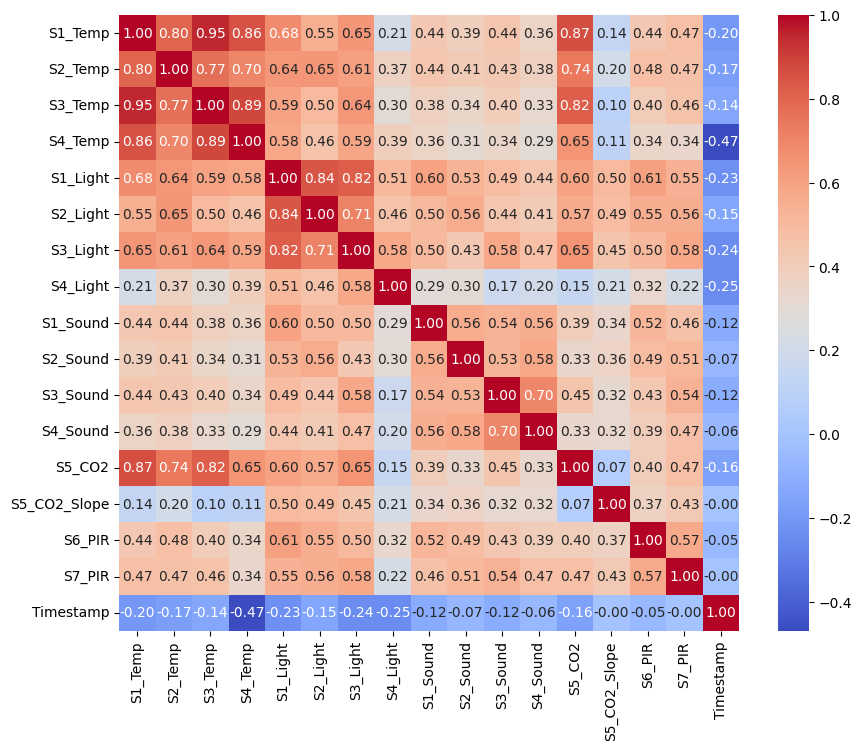

In [13]:
# Matriz de Correlación
correlation_matrix = df_X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Correlación con la variable objetivo: Occupancy       1.000000
S1_Light        0.849058
S3_Light        0.793081
S2_Light        0.788764
S1_Temp         0.700868
S7_PIR          0.695138
S2_Temp         0.671263
S5_CO2          0.660144
S3_Temp         0.652047
S6_PIR          0.633133
S5_CO2_Slope    0.601105
S1_Sound        0.573748
S2_Sound        0.557853
S3_Sound        0.531685
S4_Temp         0.526509
S4_Sound        0.460287
S4_Light        0.355715
Timestamp      -0.068468
Name: Occupancy, dtype: float64


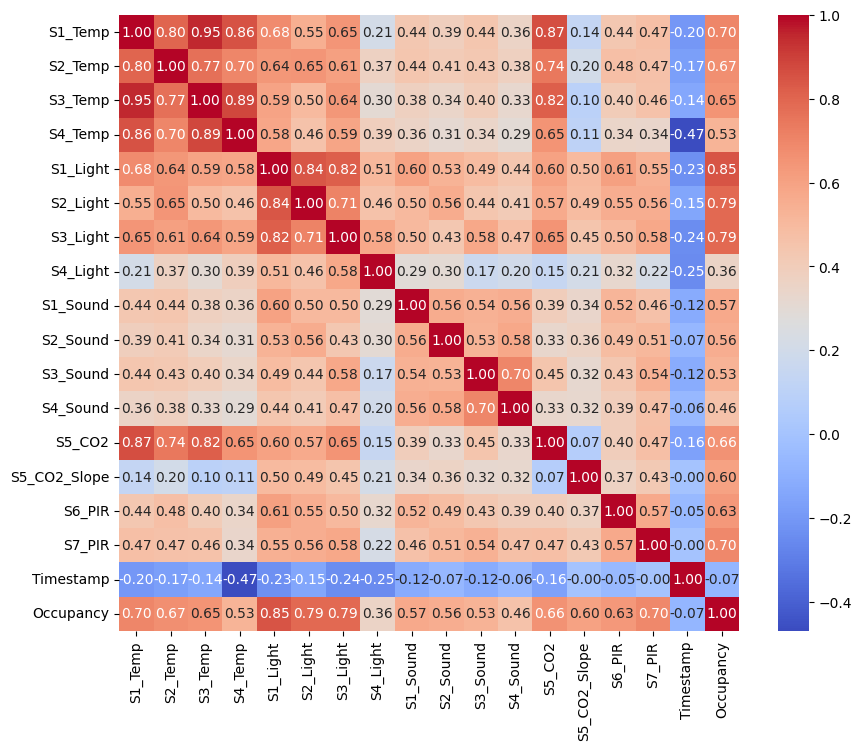

In [14]:
# Matriz de correlación con los dos dataframes

#Asignación de la columna objetivo de df_y a df_X
df_X['Occupancy'] = df_y['Room_Occupancy_Count']

#Matriz de correlación
correlation_matrix = df_X.corr()
print("Correlación con la variable objetivo:", correlation_matrix['Occupancy'].sort_values(ascending=False))

#Gráfico de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [15]:
# Arreglar Timestamp para incluir dentro de la matriz de correlación.

# Extraer Características del Tiempo
df_X['hour'] = df_X['Timestamp'].dt.hour
df_X['day_of_week'] = df_X['Timestamp'].dt.dayofweek
df_X['day_of_month'] = df_X['Timestamp'].dt.day

Correlación con la variable objetivo: Occupancy       1.000000
S1_Light        0.849058
S3_Light        0.793081
S2_Light        0.788764
S1_Temp         0.700868
S7_PIR          0.695138
S2_Temp         0.671263
S5_CO2          0.660144
S3_Temp         0.652047
S6_PIR          0.633133
S5_CO2_Slope    0.601105
S1_Sound        0.573748
S2_Sound        0.557853
S3_Sound        0.531685
S4_Temp         0.526509
S4_Sound        0.460287
S4_Light        0.355715
hour            0.258843
day_of_week     0.168623
Timestamp      -0.068468
day_of_month   -0.088434
Name: Occupancy, dtype: float64


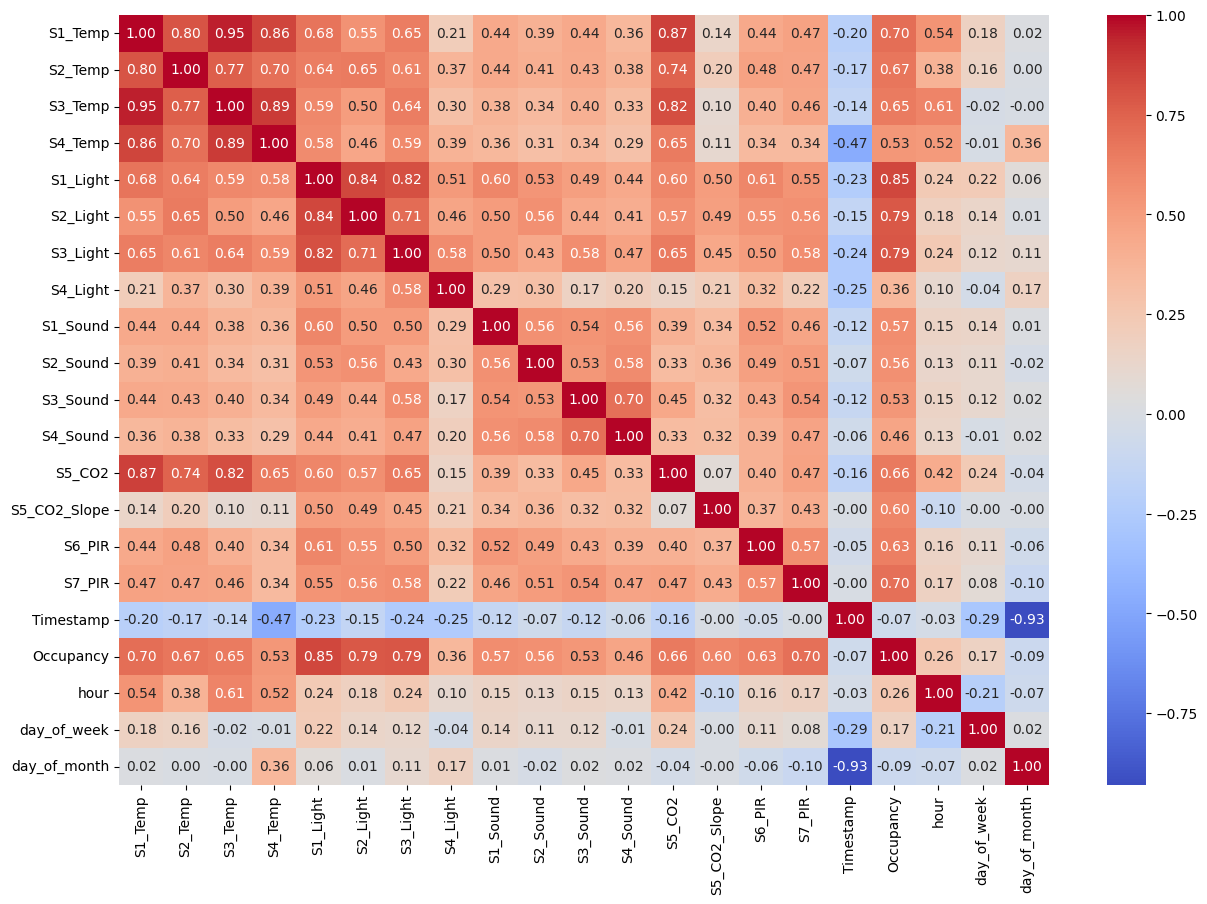

In [16]:
#Matriz de correlación Ajustada
correlation_matrix = df_X.corr()
print("Correlación con la variable objetivo:", correlation_matrix['Occupancy'].sort_values(ascending=False))

#Gráfico de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


### **Interpretación.**
 - **Correlación con la Ocupación:** Las variables S1_Temp, S2_Temp, S3_Temp, y S5_CO2 muestran correlaciones positivas significativas con la Occupancy (ocupación), lo que sugiere que a medida que aumentan las lecturas de temperatura y CO2, es más probable que la sala esté ocupada. Esto es consistente con la expectativa de que la presencia de personas aumenta la temperatura y los niveles de CO2.

 - **Variables de Tiempo:** La variable hour tiene una correlación positiva moderada con Occupancy, lo que implica que hay ciertas horas del día en las que la ocupación tiende a ser más alta. Las variables day_of_week y day_of_month no muestran una correlación fuerte, lo que sugiere que el día de la semana o del mes no son predictores tan fuertes de la ocupación como la hora del día.

 - **Timestamp:** La columna Timestamp, que probablemente fue transformada en un valor numérico para su inclusión, no muestra una correlación fuerte con Occupancy, indicando que la marca de tiempo por sí sola no es un buen predictor de la ocupación.

 - **Correlación entre Sensores:** Existe una alta correlación entre los diferentes sensores de temperatura y entre los sensores de luz, lo cual es esperado si los sensores comparten condiciones ambientales similares o están en la misma área.

 - **Menor Correlación para PIR y Sonido:** Los sensores S6_PIR, S7_PIR, y los sensores de sonido (S1_Sound a S4_Sound) tienen correlaciones más bajas con la ocupación. Esto podría indicar que no capturan la ocupación tan efectivamente como la temperatura y el CO2 o que su relación con la ocupación es más compleja y no lineal.

# Paso 3 - Análisis de Componente Principales PCA
Aunque hemos decidido mantener todos los datos, realizar un PCA puede ser útil para entender la varianza explicada por las principales componentes y reducir la dimensionalidad si es necesario.

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Primero, vamos a escalar las características, excluyendo las columnas de tiempo y la variable objetivo
features = df_X.columns.difference(['Timestamp', 'hour', 'day_of_week', 'day_of_month', 'Occupancy'])
scaler = StandardScaler()

# Asumiendo que df_X ya no tiene las columnas de Timestamp o cualquier otra no numérica
X_scaled = scaler.fit_transform(df_X[features])

# Ahora aplicamos PCA
pca = PCA(n_components=2)  # Puedes ajustar el número de componentes
principal_components = pca.fit_transform(X_scaled)

# Convertimos los componentes principales en un DataFrame para facilitar su uso
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Veamos la varianza explicada por cada componente
print(pca.explained_variance_ratio_)

[0.52256871 0.12649181]


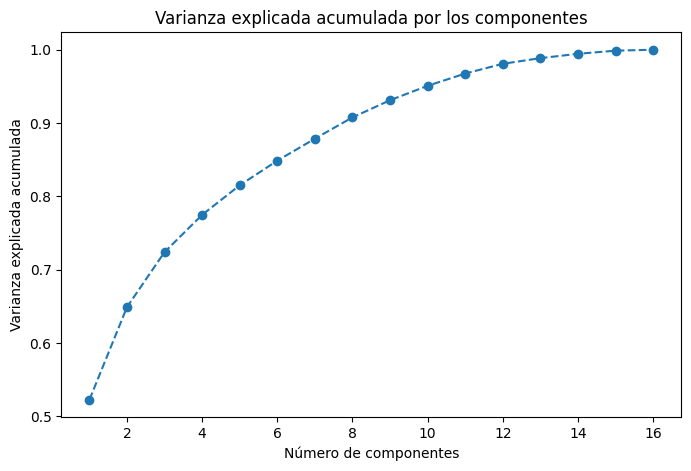

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Ajustar el PCA en tus datos escalados (ya realizaste el escalado previamente)
pca = PCA().fit(X_scaled)

# Varianza explicada acumulada
varianza_explicada_acum = pca.explained_variance_ratio_.cumsum()

# Crear un gráfico de la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_explicada_acum)+1), varianza_explicada_acum, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por los componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()

### Observaciones
 - La varianza explicada aumenta rápidamente con los primeros componentes y luego se nivela, lo que indica que cada componente adicional aporta menos información.

 - **El "punto de codo"**, donde el incremento en la varianza explicada se reduce significativamente, parece estar alrededor del componente 4 o 5. Después de este punto, los rendimientos son decrecientes; añadir más componentes no aumenta sustancialmente la varianza explicada.

 - Alrededor del componente 10, la curva parece aplanarse, indicando que incluir más de 10 componentes no contribuye significativamente a la varianza explicada.


 **Interpretación y Pasos Siguientes**
 - **Número de Componentes:** Basándote en este gráfico, podrías elegir utilizar alrededor de 4 a 5 componentes para un balance óptimo entre reducción de la dimensionalidad y retención de información. Sin embargo, la elección final también debe considerar las necesidades específicas de tu análisis o modelo y el rendimiento computacional.

 - **Modelado:** Puedes probar a entrenar modelos de machine learning con este número reducido de componentes y comparar el rendimiento del modelo con el que se obtiene usando todas las características originales.

###Nota:
Por manejo de la misma cantidad de componentes se opta por manejar 12 que fueron los que obtuvieron mejores resultados en el paper. Aunque se puede evaluar por rendimiento y consumo de recursos computacionesles si es efectivo seguir con el modelo con los 12 PCA

### Ajuste a 12 componentes

In [19]:
# Ajustar PCA con 12 componentes
pca = PCA(n_components=12)
X_pca_12 = pca.fit_transform(X_scaled)

# Para capturar la varianza explicada acumulada
varianza_explicada_acumulada_12 = pca.explained_variance_ratio_.cumsum()
print("Varianza explicada acumulada con 12 componentes:", varianza_explicada_acumulada_12[-1])

Varianza explicada acumulada con 12 componentes: 0.9807903940500768


### Comentarios

- Con una varianza explicada acumulada de aproximadamente el 98.08% con 12 componentes, significa que se ha capturado la gran mayoría de la información en tus datos originales. Esto es excelente, ya que sugiere que los componentes principales retienen la mayor parte de la variabilidad del conjunto de datos, lo que nos es muy útil para modelar.

# Paso 4 - Modelado

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Supongamos que tu variable objetivo es de clasificación y ya tienes X_pca_12 y Y
X_train, X_test, y_train, y_test = train_test_split(X_pca_12, y, test_size=0.2, random_state=42)

# Crear el clasificador SVM con kernel RBF
svm_clf = SVC(kernel='rbf')

# Entrenar el clasificador
y_train_raveled = y_train.values.ravel()
svm_clf.fit(X_train, y_train_raveled)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_clf.predict(X_test)

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM con kernel RBF: {accuracy}")
print(classification_report(y_test, y_pred))

Precisión del modelo SVM con kernel RBF: 0.9906219151036525
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       1.00      0.98      0.99       103
           2       0.96      0.97      0.96       164
           3       0.94      0.94      0.94       140

    accuracy                           0.99      2026
   macro avg       0.97      0.97      0.97      2026
weighted avg       0.99      0.99      0.99      2026



## Realizamos validación cruzada k-fold

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Crear el clasificador SVM con kernel RBF
svm_clf = SVC(kernel='rbf')

# Ejecutar la validación cruzada k-fold
# Usaremos 5 folds en este ejemplo
scores = cross_val_score(svm_clf, X_pca_12, y.iloc[:, 0].ravel(), cv=5, scoring='accuracy')

# Imprimir los resultados de la precisión para cada fold
print(f"Precisión en cada fold: {scores}")

# Imprimir la precisión media y la desviación estándar
print(f"Precisión media: {scores.mean()}")
print(f"Desviación estándar de la precisión: {scores.std()}")

Precisión en cada fold: [0.95804541 0.98420533 0.99457058 0.99160908 0.94765432]
Precisión media: 0.975216945145211
Desviación estándar de la precisión: 0.0188606276692998


### **Analisis de los resultados**
  Los resultados de la validación cruzada indican que tu modelo SVM con kernel RBF es bastante robusto y generaliza bien a través de diferentes subconjuntos de tus datos:

 - **Precisión en Cada Fold:** Las precisiones individuales varían desde un mínimo de aproximadamente 94.77% hasta un máximo de 99.46%, lo que sugiere un rendimiento generalmente alto en todos los subconjuntos del conjunto de datos.

 - **Precisión Media:** Una precisión media de aproximadamente 97.52% es impresionante y sugiere que el modelo es efectivo en la clasificación en este conjunto de datos.

 - **Desviación Estándar de la Precisión:** Una desviación estándar de aproximadamente 1.89% indica que la variación en el rendimiento del modelo entre los diferentes folds de la validación cruzada no es muy grande. Esto es una buena señal de que el modelo es estable.

### **Interpretación**
- La validación cruzada ha confirmado que tu modelo es fiable y se desempeña de manera consistente a través de diferentes porciones de los datos. Los cambios relativamente pequeños en la precisión a través de los folds sugieren que el modelo no está sufriendo de sobreajuste significativo y es probable que mantenga un rendimiento similar en datos no vistos previamente.

### Matriz de Confusion e Informe de Clasificación

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Calcular la matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_mat)

# Calcular otras métricas como precisión, recall y F1-score
class_report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(class_report)

Matriz de Confusión:
[[1615    0    0    4]
 [   0  101    2    0]
 [   0    0  159    5]
 [   3    0    5  132]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       1.00      0.98      0.99       103
           2       0.96      0.97      0.96       164
           3       0.94      0.94      0.94       140

    accuracy                           0.99      2026
   macro avg       0.97      0.97      0.97      2026
weighted avg       0.99      0.99      0.99      2026



### **Discusión de resultados**
 - **Matriz de Confusión:**
  - **La clase 0** 1615 verdaderos positivos y 4 falsos positivos (errores en los que se predijo otra clase como 0).
  - **La clase 1** también tiene un alto rendimiento, con 101 predicciones correctas y solo unos pocos errores. La clase 1 ha sido confundida en 2 ocasiones como clase 2.
  - **La clase 2** tiene un alto recall, pero ha sido confundida en 3 ocasiones como clase 0 y 5 veces como clase 3.
  - **La clase 3**, mientras muestra una precisión y un recall altos, se ha confundido con la clase 2 en 5 ocasiones.

 - **Informe de Clasificación:**
  - **Precisión:** Las clases 0 y 1 tienen una precisión de 1.00 y 1.00 respectivamente, lo que indica que casi todas las predicciones para estas clases fueron correctas. La clase 2 y la clase 3 también muestran una alta precisión con 0.96 y 0.94 respectivamente.
  - **Recall:** Todas las clases tienen un recall alto, siendo 1.00 para la clase 0, 0.98 para la clase 1, 0.97 para la clase 2 y 0.94 para la clase 3. Esto indica que el modelo es capaz de identificar la mayoría de los casos positivos correctamente para todas las clases.
  - **F1-Score:** Los F1-scores son también altos para todas las clases, lo que sugiere un buen equilibrio entre precisión y recall.
  - **Support:** Indica el número de casos reales para cada clase en tu conjunto de datos de prueba.

 La precisión general del modelo es del 99%, lo cual es excepcional. Los promedios ponderados de precisión, recall y F1-score son todos 0.99, lo que refleja el alto rendimiento general del modelo a través de todas las clases.

# Conclusiones Generales
 - El modelo tiene un rendimiento sobresaliente con una alta precisión y capacidad para generalizar a través de todas las clases. La confusión entre clases es mínima, y la precisión y el recall son altos en general. La desviación entre la precisión y el recall para las clases 2 y 3 podría ser un área para explorar mejoras potenciales, tal vez a través del ajuste de hiperparámetros o de técnicas de balanceo de clases si es necesario.
 - La aplicación de PCA para reducir a 12 componentes principales ha sido efectiva, logrando retener aproximadamente el 98.08% de la varianza de los datos. Esto no solo simplifica el modelo y reduce el riesgo de sobreajuste, sino que también mantiene la mayor parte de la información importante.
 - La validación cruzada ha proporcionado una evaluación robusta del modelo, confirmado que el alto rendimiento no es producto de un ajuste específico a un subconjunto particular de los datos.

**Sugerencias para Mejoras**
 - **Ajuste de Hiperparámetros:** Aunque el modelo ya es eficiente, podría haber un espacio para mejorar ajustando hiperparámetros como el C y el gamma. Herramientas como GridSearchCV pueden ayudar a encontrar la combinación óptima de estos parámetros.

 - **Examinación de Errores y Métricas Adicionales:** Sería beneficioso realizar un análisis de errores para identificar y entender los casos en los que el modelo falla. Además, considerar métricas adicionales como la precisión, recall, y F1-score proporcionará una imagen más completa del rendimiento del modelo, especialmente en términos de cómo maneja diferentes clases.
 - Si es posible, evaluar el modelo en un conjunto de datos completamente independiente sería un buen paso para confirmar los resultados antes de una implementación a mayor escala.
